In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
path = os.getcwd() + '\dane1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

# Linear regression with one variable
## Exercise 1
Examining input data

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## Exercise 2
Plotting and analyzing data

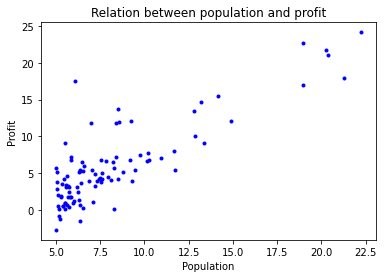

In [5]:
plt.plot(data['Population'], data['Profit'], '.b')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Relation between population and profit')
plt.show()

## Exercise 3
Inserting new coulmn to Dataframe

In [6]:
data.insert(loc=0, column='Cost', value=1, allow_duplicates=False)

## Exercise 4
Checking if column has been added correctly and variables separation

In [7]:
data.head()

,Cost,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [8]:
X = data[['Cost', 'Population']]
X.head()

,Cost,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y = data.Profit
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64

In [10]:
# Data conversion
X = np.matrix(X.values, dtype=np.float64)
y = np.matrix(y.values, dtype=np.float64)
theta = np.matrix(np.array([0,0]), dtype=np.float64)
# transpose if necessary
if len(X) != 1:
    X = np.transpose(X)
if len(y) != 1:
    y = np.transpose(y)

In [11]:
X.shape

(2, 97)

In [12]:
y.shape

(1, 97)

## Exercise 5

## Exercise 6
Cost function definition, adjusted for many columns in X

In [13]:
def computeCost(X, y, theta):
    m = X.shape[1]
    cost = (1/(2*m))*np.sum(np.power(np.dot(theta, X) - y, 2))
    return cost

In [14]:
computeCost(X, y, theta)

32.072733877455676

## Exercises 7 & 8
Gradient descent method definition

In [15]:
def gradient_prosty(X, y, theta, alpha, it):
    m = X.shape[1]
    costHist = []
    thetaTemp = theta
    for i in range(it):
        for j in range(theta.shape[1]):
            thetaTemp[0,j] = thetaTemp[0,j] - alpha * (1/m) * np.sum((np.dot(theta, X) - y) *  np.transpose(X[j]))
        theta = thetaTemp
        costHist.append(computeCost(X,y, np.matrix(np.array(theta))))
    return costHist, theta

## Exercise 9
Calculating optimal parameters for dataset

In [16]:
#initial values for learning rate and no. of iterations
alpha = 0.01
it = 1000

cost = gradient_prosty(X, y, theta, alpha, it)[0]
theta_result = gradient_prosty(X, y, theta, alpha, it)[1]

## Exercise 9
Printing optimal parametres for dataset

In [17]:
theta_result

matrix([[-3.79118595,  1.18254485]])

## Exercise 10
Printing cost function for optimal theta parameters

In [18]:
cost[:][0].item()

6.79372769071752

## Exercise 11
Plotting the regression function and dataset

In [19]:
#predicted values
predY = theta_result * X

In [20]:
# For plotting purposes only
X = np.squeeze(np.asarray(X[1]))
y = np.squeeze(np.asarray(y))
predY = np.squeeze(np.asarray(predY))

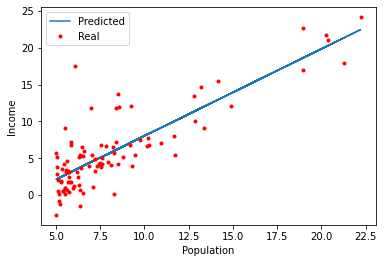

In [21]:
plt.plot(X, predY, X, y, 'r.')
plt.xlabel('Population')
plt.ylabel('Income')
plt.legend(['Predicted', 'Real'])
plt.show()

## Exercise 12
Modyfing gradient descent method to plot relationship between cost function and number of iterations

In [22]:
iterations = range(it)
costVal = np.squeeze(np.asarray(cost))

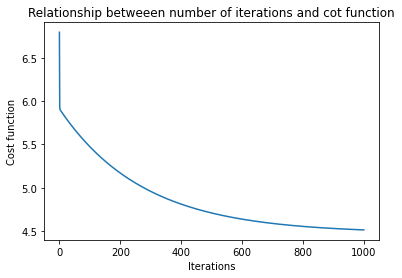

In [23]:
plt.plot(iterations, costVal)
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.title('Relationship betweeen number of iterations and cot function')
plt.show()

# Linear regression with multiple variables

## Exercise 1
Examining input data

In [53]:
path = os.getcwd() + '/dane2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [54]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


Data normalization

In [55]:
data2.Bedrooms = (data2.Bedrooms - data2.Bedrooms.mean()) / data2.Bedrooms.std()
data2.Size = (data2.Size - data2.Size.mean()) / data2.Size.std()
data2.Price = (data2.Price - data2.Price.mean()) / data2.Price.std()

In [56]:
data2.insert(loc=0, column='Cost', value=1, allow_duplicates=False)

In [57]:
data2.describe()

,Cost,Size,Bedrooms,Price
count,47.0,4.700000e+01,4.700000e+01,4.700000e+01
mean,1.0,3.779483e-17,2.746030e-16,-9.684924e-17
std,0.0,1.000000e+00,1.000000e+00,1.000000e+00
min,1.0,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,1.0,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,1.0,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,1.0,3.376348e-01,1.090417e+00,3.521863e-01
max,1.0,3.117292e+00,2.404508e+00,2.874981e+00


## Exercise 2
## Exercise 3
Inserting new column to dataframe

In [59]:
data2.head()

,Cost,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


## Exercise 4
Separating the data

In [60]:
X = data2[['Cost', 'Size', 'Bedrooms',]]
X.head()

,Cost,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [61]:
y = data2['Price']
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: Price, dtype: float64

In [62]:
# Data conversion
X = np.matrix(X.values, dtype=np.float64)
y = np.matrix(y.values, dtype=np.float64)
theta = np.matrix(np.array([0,0,0]), dtype=np.float64)
# transpose if necessary
if len(X) != 1:
    X = np.transpose(X)
if len(y) != 1:
    y = np.transpose(y)

In [63]:
X.shape

(3, 47)

In [64]:
y.shape

(1, 47)

## Exercise 5

## Exercise 6
Calculating cost function for initial parameters

In [65]:
computeCost(X, y, theta)

0.4893617021276595

## Exercise 9
Calculating optimal parameters for dataset

In [66]:
#initial values for learning rate and no. of iterations
alpha = 0.01
it = 1000

cost = gradient_prosty(X, y, theta, alpha, it)[0]
theta_result = gradient_prosty(X, y, theta, alpha, it)[1]

## Exercise 9
Printing optimal parametres for dataset

In [67]:
theta_result

matrix([[-9.68905807e-17,  8.84684523e-01, -5.30975308e-02]])

## Exercise 10
Printing cost function for optimal theta parameters

In [68]:
cost[:][0].item()

0.4805685514694705

## Exercise 11
Plotting the regression function and dataset

In [69]:
# For plotting purposes only
X1,X2 = np.meshgrid(np.linspace(-3,3,1000), np.linspace(-3,3,1000))
y = np.squeeze(np.asarray(y))

In [70]:
# calculating predicted values
predY = theta_result[0,0] + theta_result[0,1] * X1 + theta_result[0,2] * X2 
predY = np.squeeze(np.asarray(predY))

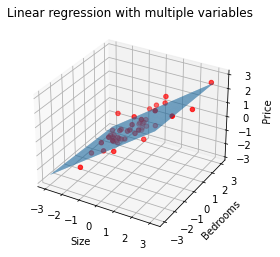

In [72]:
# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(projection='3d')

# plot the surface
ax.plot_surface(X1, X2, predY, alpha=0.8)

ax.scatter(data2.Size, data2.Bedrooms, data2.Price, c='r')
plt.title("Linear regression with multiple variables")
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
 
# show plot
plt.show()


Plotting 2D graphs

In [77]:
X1 = np.squeeze(np.asarray(X[1]))
X2 = np.squeeze(np.asarray(X[2]))
predY1 = theta_result[0,0] + theta_result[0,1] * X1
predY1 = np.squeeze(np.asarray(predY1))
predY2 = theta_result[0,0] + theta_result[0,2] * X2
predY2 = np.squeeze(np.asarray(predY2))

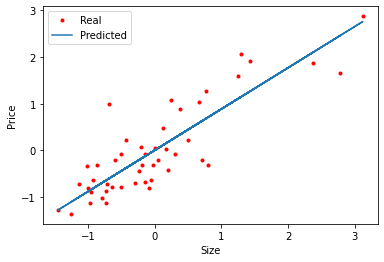

In [78]:
plt.plot(X1, y, '.r', X1, predY1)
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend(['Real', 'Predicted'])
plt.show()

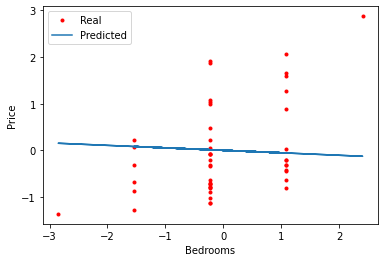

In [79]:
plt.plot(X2, y, '.r', X2, predY2)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.legend(['Real', 'Predicted'])
plt.show()

# Linear regression - python

## Data preparation

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [125]:
# Load the diabetes dataset
boston = datasets.load_boston()
# print description
print(boston.DESCR)
# get the data
boston_X = boston.data
boston_Y = boston.target

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [126]:
boston_X = (boston_X - boston_X.mean()) / boston_X.std() 
boston_Y = (boston_Y - boston_X.mean()) / boston_Y.std() 

## Exercise 1

In [127]:
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_Y, test_size = 0.3) 

In [128]:
# Stworzenie obiektu 
regr = linm.LinearRegression()

In [129]:
# Uczenie modelu przy pomocy bazy treningowej
regr.fit(X_train, y_train)
# Przewidywanie wartości dla danych testowych
Y_predicted = regr.predict(X_test)

In [130]:
# Wyświetlenie parametrów prostej
print('Coefficients: \n', regr.coef_)
 
#  Obliczamy rzeczywisty popełniony błąd średnio-kwadratowy
error = np.mean((regr.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [-1.15145456e+00  7.26909722e-01 -2.01074904e-01  6.50107006e+01
 -2.42209839e+02  5.78280678e+01 -5.03608830e-02 -2.34679828e+01
  4.93001298e+00 -1.95043220e-01 -1.58704521e+01  1.29422240e-01
 -8.63946988e+00]
Residual sum of squares: 0.24923695386352


Calculating MSE and R2 metrics

In [131]:
r2 = r2_score(y_test,Y_predicted)
r2

0.7153717507827456

In [132]:
mse = mean_squared_error(y_test, Y_predicted)
mse

0.24923695386352

In [133]:
boston_df = pd.DataFrame(boston_X, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.482707,-0.358746,-0.466837,-0.482751,-0.479045,-0.437455,-0.033578,-0.454574,-0.475862,1.556441,-0.377347,2.251557,-0.448443
1,-0.482563,-0.482751,-0.434045,-0.482751,-0.479520,-0.438516,0.060804,-0.448532,-0.468973,1.184426,-0.360124,2.251557,-0.419784
2,-0.482563,-0.482751,-0.434045,-0.482751,-0.479520,-0.433252,-0.061823,-0.448532,-0.468973,1.184426,-0.360124,2.223519,-0.454988
3,-0.482528,-0.482751,-0.467733,-0.482751,-0.479596,-0.434541,-0.167227,-0.440987,-0.462083,1.046643,-0.353924,2.235919,-0.462497
4,-0.482275,-0.482751,-0.467733,-0.482751,-0.479596,-0.433514,-0.109358,-0.440987,-0.462083,1.046643,-0.353924,2.251557,-0.446032


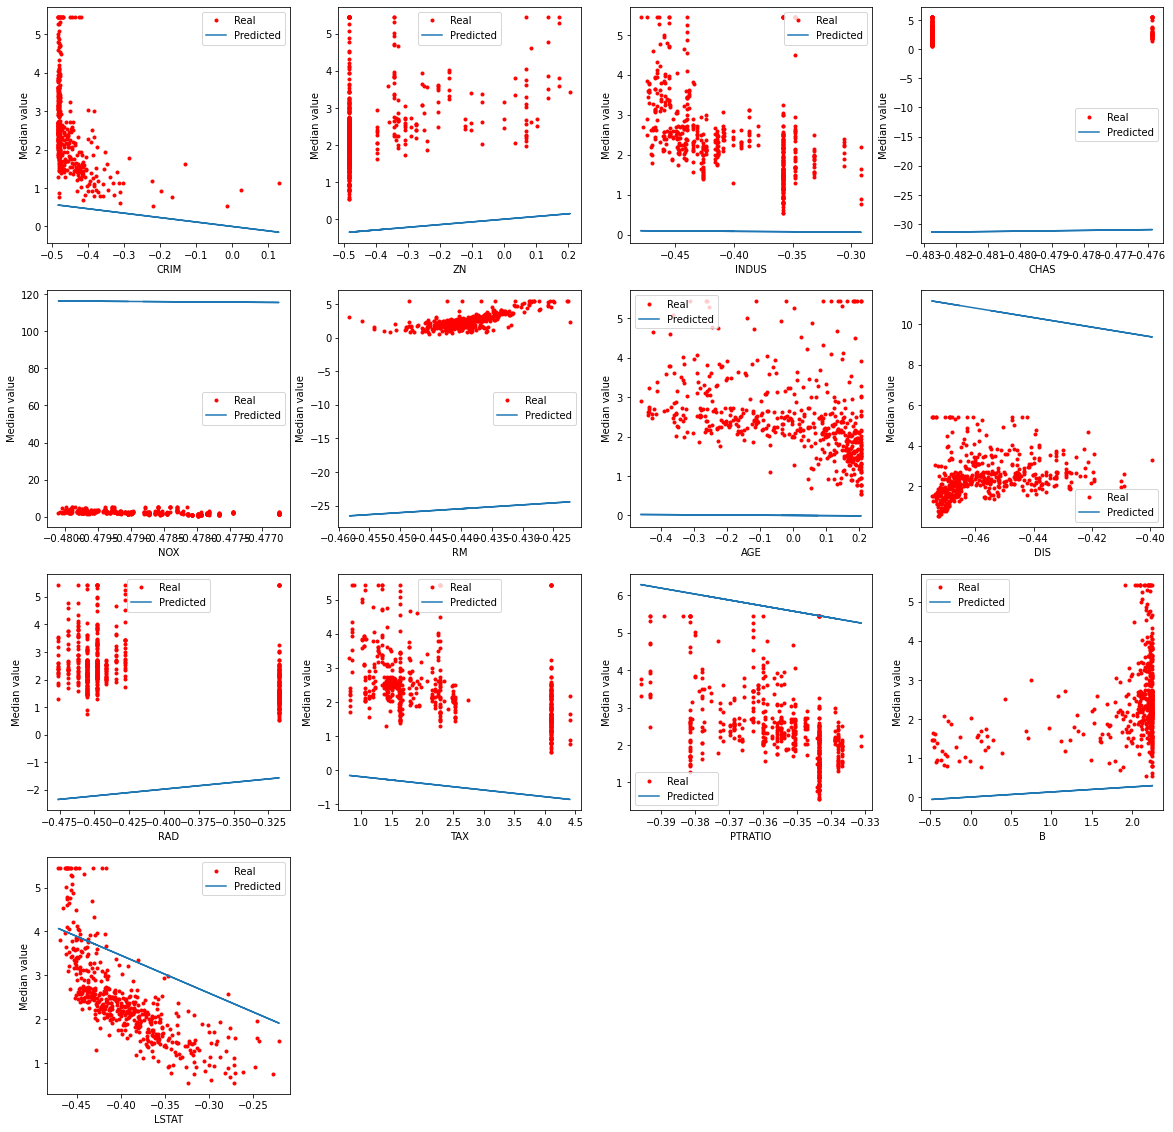

In [145]:
Y = np.squeeze(np.asarray(boston_Y))
pos = 0
for i in boston.feature_names:
    X = boston_df[i]
    X = np.matrix(X)
    predY = regr.coef_[pos] * X
    X = np.squeeze(np.asarray(X))
    predY = np.squeeze(np.asarray(predY))
    plt.subplot(4, 4, pos + 1)
    plt.plot(X, Y, '.r', X, predY)
    plt.xlabel(i)
    plt.ylabel('Median value')
    plt.legend(['Real', 'Predicted'])
    pos = pos + 1
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()